<a href="https://colab.research.google.com/github/peilles/peilles.github.io/blob/master/rethinking_chapter_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


- McElreath (2020). Statistical Rethinking. CRC Press.
- 2021-07-05


## Chpater 2.

성공률 $\theta$인 실험을 $n$번 시행해서 $y$번 성공했을 때

Prior:
$$
  \theta \sim \textit{Beta}(\alpha,\beta)
  $$


Likelihood:

$$
y|\theta \sim \textit{Binomial}(n, \theta)
$$

Posterior:
$$
\theta|y \sim \textit{Beta}(y+\alpha, n-y + \beta)
$$

Maximum A Poteriori Estimator:
$$
\hat\theta_\text{MAP} = \frac{y+\alpha-1}{n+\alpha+\beta-2}
$$

In [ ]:
%%R
## prior: theta ~ Beta(alpha, beta)
alpha <- 2
beta <- 2

## data (likelhood): y|theta ~ Binomial(n, theta)
## n: number of trials
## y : number of successes
## n - y : number of failures
##
n <- 5
y <- 1

## posterior: theta|y ~ Beta(y + alpha, n - y + beta)
new_alpha <- y + alpha
new_beta <- n - y + beta


par(mfrow=c(1,3))
## draw prior probability density function
curve(dbeta(x, alpha, beta), main='Prior', ylab="Probability Density", xlab='theta')

## draw likelihood function


pgrid <- seq(0, 1, length.out=100)
plot(pgrid, dbinom(y, size=n, prob=pgrid), type='l', main='Likelihood', ylab='Likelihood', xlab='theta')

## Maximum Likelihood Estimator
theta.mle <- y / n
abline(v=theta.mle, col='red')
mtext(paste('MLE =', theta.mle), font=2, cex=0.8)


## draw posterior probability density function
curve(dbeta(x, shape1=new_alpha, shape2=new_beta), main="Posterior", ylab='Probability Density', xlab='theta')

## Maximum A Posterior Estimator
theta.map <- (y + alpha - 1)/ (n + alpha + beta - 2)
abline(v=theta.map, col='red')
mtext(paste('MAP = ', round(theta.map, 3)), font=2, cex=0.8)


png 
  2 


## Figure 2.5 (p. 30)

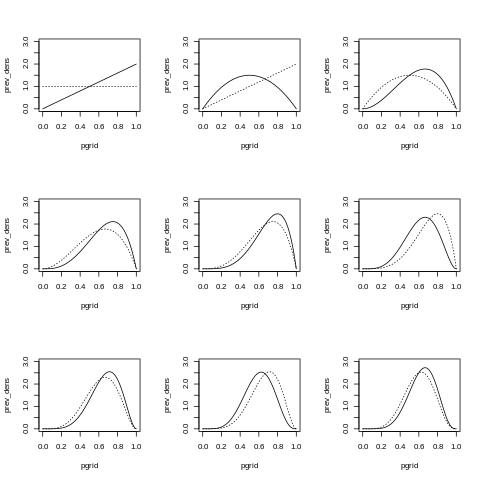

In [ ]:
%%R

## W: 1, L: 0
x <- c(1, 0, 1, 1, 1, 0, 1, 0, 1)  
alpha <- 1
beta <- 1

pgrid <- seq(0, 1, length.out=100)
prev_dens <- dbeta(pgrid, alpha, beta)
par(mfrow=c(3, 3))
for(i in 1:length(x)) {
    n <- i
    y <- sum(x[1:i])
    dens <- dbeta(pgrid, y + alpha, n - y + beta)
    plot(pgrid, prev_dens, ylim=c(0, 3), type='l', lty=3)
    lines(pgrid, dens)
    prev_dens <- dens

}


## Figure 2.6 (p. 38)

이 그림에서 $y$축에 수치를 표시하지 않고 있다는 점에 주의하세요. 사전분포(prior), 가능도(likelihood), 사후분포(posterior)의 그래프에서 $y$축의 값은 모두 다릅니다. 모양만 보기 위해서 $y$축에 수치를 표시하지 않은 것입니다. 특히 사후분포의 경우에 사용된 R code는 정확히 사후분포를 그리는 것이 아닙니다. 모양만 사후분포와 동일하고 $y$축의 값은 다릅니다. 

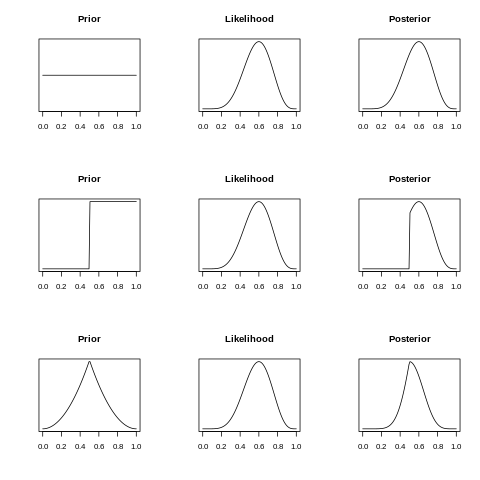

In [ ]:
%%R

n <- 10
y <- 6

pgrid <- seq(0, 1, length.out=100)

prior <- list(
    function(theta) ifelse(0 <= theta & theta <= 1, 1, 0),
    function(theta) ifelse(0.5 < theta & theta <= 1, 1, 0),
    function(theta) ifelse(0 <= theta & theta < 0.5, 12*theta^2,  12*(theta-1)^2)
)
likelihood <- function(theta) dbinom(y, size=n, prob=theta)



par(mfrow=c(3, 3), xlab='', ylab='', yaxt='n')
for (i in 1:length(prior)) {
  plot(pgrid, prior[[i]](pgrid), type='l', main='Prior', xlab='', ylab='', yaxt='n')
  plot(pgrid, likelihood(pgrid), type='l', main='Likelihood',  xlab='', ylab='', yaxt='n')
  plot(pgrid, prior[[i]](pgrid)*likelihood(pgrid), type='l', main='Posterior',  xlab='', ylab='', yaxt='n')
}


## Likelihood

Binomial pdf: function of $y$ (number of successes), given $n$ (number of trials) and $p$ (probability of success)

```r
dbinom(y, size=10, prob=0.5)
```

Likelihood: function of $p$, given $n$ and $y$

```
dbinom(6, size=10, prob=p)
```



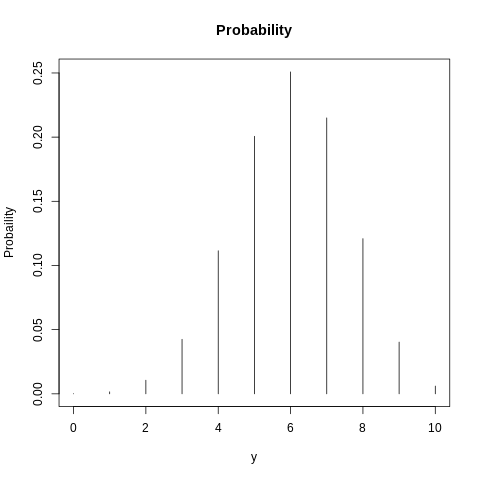

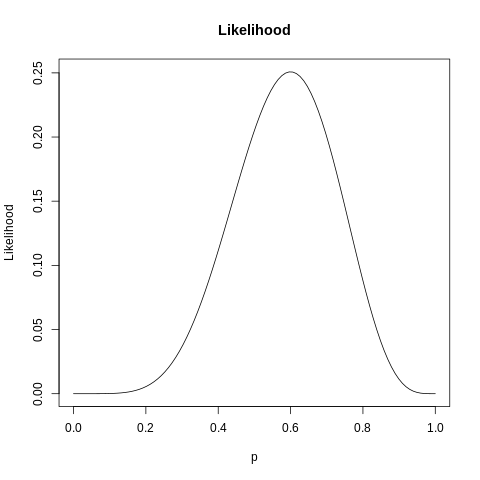

In [ ]:
%%R
n <- 10
y <- 6

## binomial probability function (pdf, pmf)
plot(0:10, dbinom(0:10, size=10, prob=0.6), type='h', ylab='Probaility', xlab="y", main="Probability")

## likelihood
pgrid <- seq(0, 1, length.out=100)
plot(pgrid, dbinom(6, size=10, prob=pgrid), type='l', ylab='Likelihood', xlab="p", main="Likelihood")




### Math

\begin{align*}
p(\theta) &= \frac{1}{B(\alpha,\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1}, &\theta &\sim \textit{Beta}(\alpha,\beta)\\
p(y|\theta) &= \binom{n}{y}\theta^y (1-\theta)^{n-y} & y|\theta &\sim \textit{Binomial}(n, \theta)\\
p(\theta|y) &\propto p(\theta)p(y|\theta)\\
&\propto \theta^{y+\alpha-1}(1-\theta)^{n-y+\beta-1},  &\theta|y &\sim \textit{Beta}(y+\alpha, n-y+\beta)
\end{align*}

